# Project: Investigate a Dataset - [TMDb movie data ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this report, I will be analysing tmdb-movies.csv which is the dataset for The Movie Database(TMDb). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


"The column names in the table are `'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj' and 'revenue_adj'`

- Certain columns, like ‘cast’ and 'genres', contain multiple values separated by pipe (|) characters.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
 
- Which genres are most popular from year to year? 
- Has the number of movies produced annually since 2000 increased?
- Which directors produced the most movies?
- Does the length of a movie affect its rating?
- Is a higher budget associated with a higher revenue?
- Which genres were produced the most and which were the most popular?
- Which were the top 10 most successfull movies of all time?

In [77]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [78]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08



Getting the total number of rows and columns in the dataset


In [79]:
# Dimensions of the dataset
df.shape

(10866, 21)

Knowing the data by discovering different data types for all the columns in the dataset

In [80]:
# Datatypes of the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Displaying an overal summary of the dataset and getting a hint on the amount of missing values

In [81]:
# Summary of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Displaying the total number of unique values in each column of the dataset

In [82]:
# The number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Descriptive statistics for all the usefull columns

In [83]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


It is notable from these statistics that at least 50% of the movies had a budget and revenue of $0 and some movies had a runtime of 0 minutes. This indicates a huge possibility of missing values.

In [84]:
# Descriptive statistics for objects
df.describe(include=object)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


The preceding descriptive statistics allows us to understand more about the data and notice properties like Paramont Pictures produced the most movies, some movies did not have an overview and about 295 movies did not have a unique original title.


### Data Cleaning
 

In [85]:
# Dropping columns that are unnecessary for the research
df.drop(['imdb_id', 'homepage', 'cast', 'tagline','keywords', 'overview', 'production_companies'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Getting a view of the new dataset with only the columns necessary for the analysis

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


Getting a summary of the dataset with only the usefull columns for analysis

In [87]:
# Checking the number of duplicates in the data
sum(df.duplicated())

1

Getting the amount of duplicates in the data

In [88]:
# Dropping the duplicate
df.drop_duplicates(inplace=True)

Deleting the duplicated row in the dataset

In [89]:
# Confirming correction 
sum(df.duplicated())

0

Confirming the duplicated row has been deleted by checking the number of duplicates again

In [90]:
# Converting the release_date data type from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

Converting the data type of release_date to datetime in order to handle it easily with python code

In [91]:
# Selecting only the entries where the budget is greater than $0
#  and the runtime is greater than 0 minutes for more accurate analysis
data = df.query('budget>0 and runtime>0').copy()

Making another copy of the dataset but with only the entries where the budget and the run time were not 0

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5166 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5166 non-null   int64         
 1   popularity      5166 non-null   float64       
 2   budget          5166 non-null   int64         
 3   revenue         5166 non-null   int64         
 4   original_title  5166 non-null   object        
 5   director        5162 non-null   object        
 6   runtime         5166 non-null   int64         
 7   genres          5165 non-null   object        
 8   release_date    5166 non-null   datetime64[ns]
 9   vote_count      5166 non-null   int64         
 10  vote_average    5166 non-null   float64       
 11  release_year    5166 non-null   int64         
 12  budget_adj      5166 non-null   float64       
 13  revenue_adj     5166 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
m

Getting a summary of the dataset with only the entries where the budget and the run time were not 0

In [93]:
data.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          4
runtime           0
genres            1
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

cheak if exist any null value in data

In [94]:
data.dropna(inplace=True)
data.isnull().sum().any()

False

droping all row that have a null value

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5161 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5161 non-null   int64         
 1   popularity      5161 non-null   float64       
 2   budget          5161 non-null   int64         
 3   revenue         5161 non-null   int64         
 4   original_title  5161 non-null   object        
 5   director        5161 non-null   object        
 6   runtime         5161 non-null   int64         
 7   genres          5161 non-null   object        
 8   release_date    5161 non-null   datetime64[ns]
 9   vote_count      5161 non-null   int64         
 10  vote_average    5161 non-null   float64       
 11  release_year    5161 non-null   int64         
 12  budget_adj      5161 non-null   float64       
 13  revenue_adj     5161 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
m

Getting a summary of the dataset with only the entries where the value is not null

<a id='eda'></a>
## Exploratory Data Analysis



In [96]:
# Define the function to split genres
def split_genres(df, column_name):
    return df.assign(genres=df[column_name].str.split('|')).explode('genres')


def plot_scatter(df, x, y, title, xlabel, ylabel):
    df.plot(kind='scatter', x=x, y=y, alpha=0.5, figsize=(10, 6), title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    
def plot_bar(df, title, xlabel, ylabel, color='blue'):
    df.plot(kind='bar', color=color, figsize=(10, 6), title=title)
    plt.xlabel(xlabel)  # Set x-axis label to 'Director' or as provided
    plt.ylabel(ylabel)  # Set y-axis label to 'Number of Movies' or as provided
    plt.show()


### Question 1 Which genres are most popular from year to year?

 Since the 'genres' column has multiple values separated by a pipe (|) character, first need to split it for analysis.
 

In [97]:


# Use the function to split genres and expand into separate rows
genres_split = split_genres(df, 'genres')


To see which genres are most popular, needed calculate the popularity of each genre for each year

In [98]:
# Group by year and genre, summing the popularity
genre_popularity = genres_split.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()
genre_popularity 

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


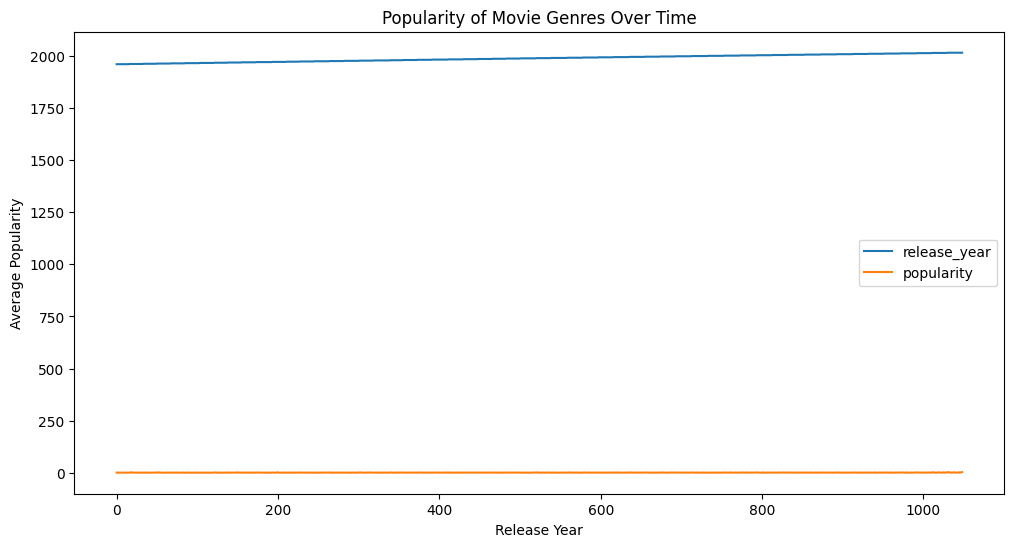

In [99]:
# Fill missing values with 0 for plotting purposes
genre_popularity.fillna(0, inplace=True)

# Plot the top genres
genre_popularity.plot(kind='line', figsize=(12, 6), title="Popularity of Movie Genres Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()


This line plot will show the average popularity trend for each genre across different years, helping you see which genres were popular over time.

###  Question 2  Has the number of movies produced annually since 2000 increased?

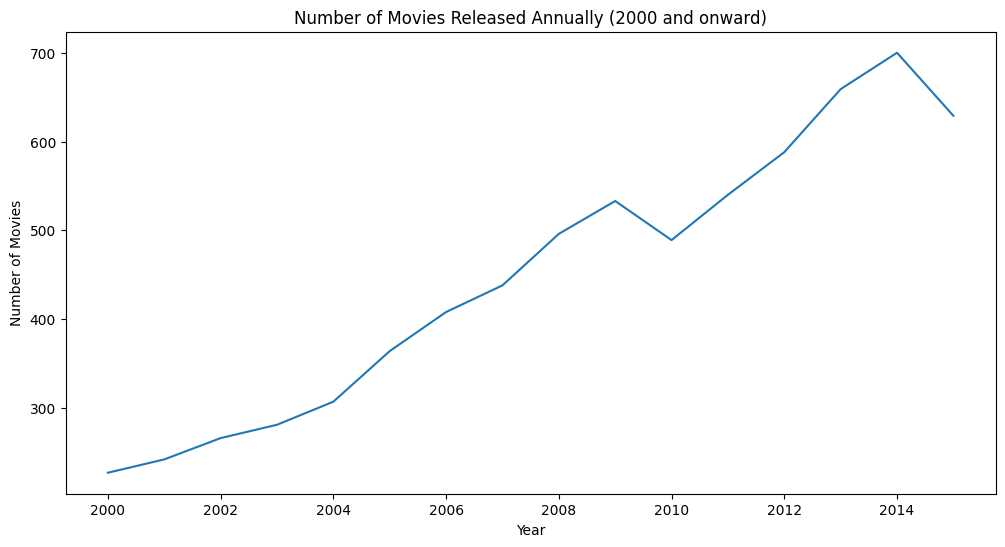

In [100]:
# Filter the data to only include movies from the year 2000 onward
df_filtered = df[df['release_year'] >= 2000]

# Count the number of movies released per year
movie_counts = df_filtered['release_year'].value_counts().sort_index()

# Plotting the number of movies released annually
movie_counts.plot(kind='line', figsize=(12, 6), title="Number of Movies Released Annually (2000 and onward)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


The preceding line graph shows the increasing number of movies released since 2000 with most movies having been produced in 2014

###  Question 3  Which directors produced the most movies?

In [101]:
# Count the number of movies each director has in the dataset
director_counts = df['director'].value_counts()

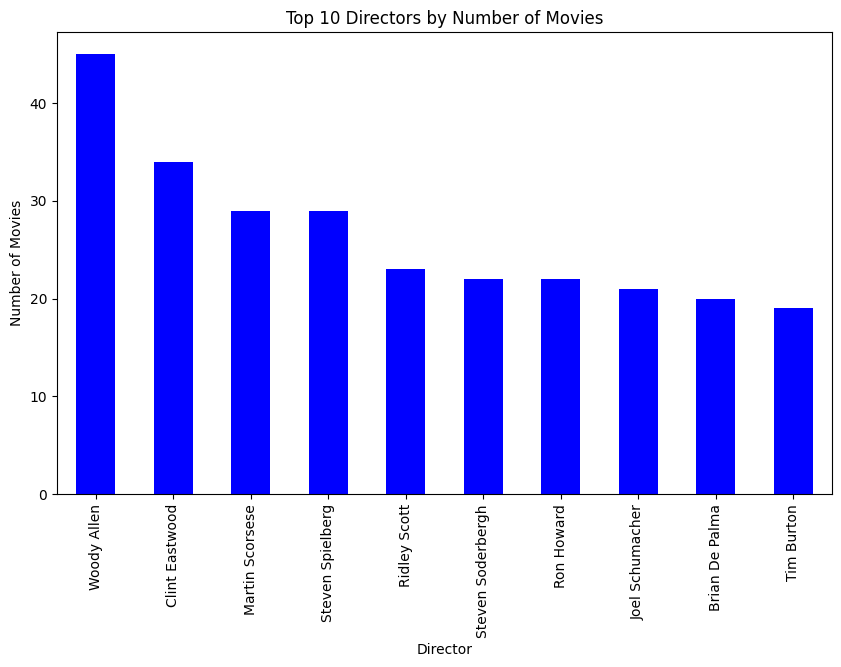

In [102]:
# Get top 10 directors by movie count
top_directors = director_counts.head(10)
# Plot
plot_bar(top_directors, "Top 10 Directors by Number of Movies", "Director", "Number of Movies")

The preceding graph shows the directors with the most movies with director Woody Allen having produced the most movies.

###  Question 4  Does the length of a movie affect its rating?

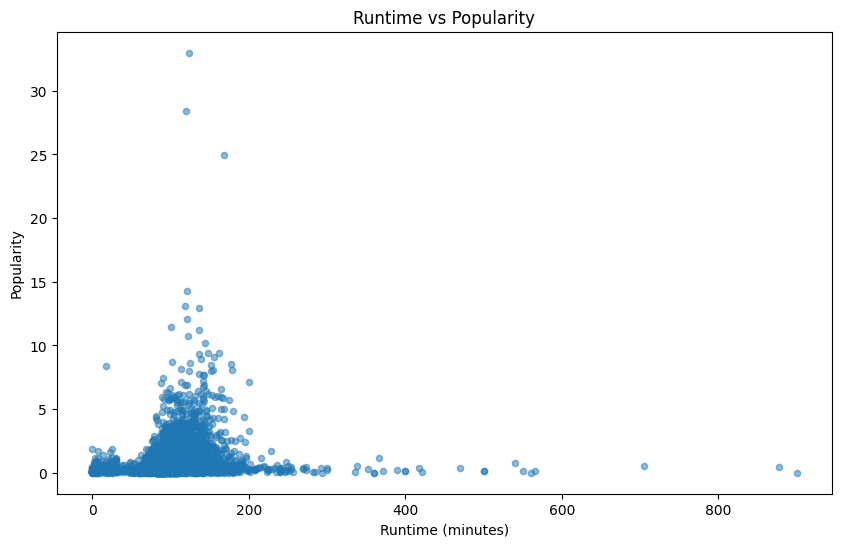

In [103]:
# Plotting Runtime vs Popularity
plot_scatter(df, 'runtime', 'popularity', "Runtime vs Popularity" , "Runtime (minutes)", "Popularity")

This graph shows that the most popular movies had a run time less or equal than 200 minutes

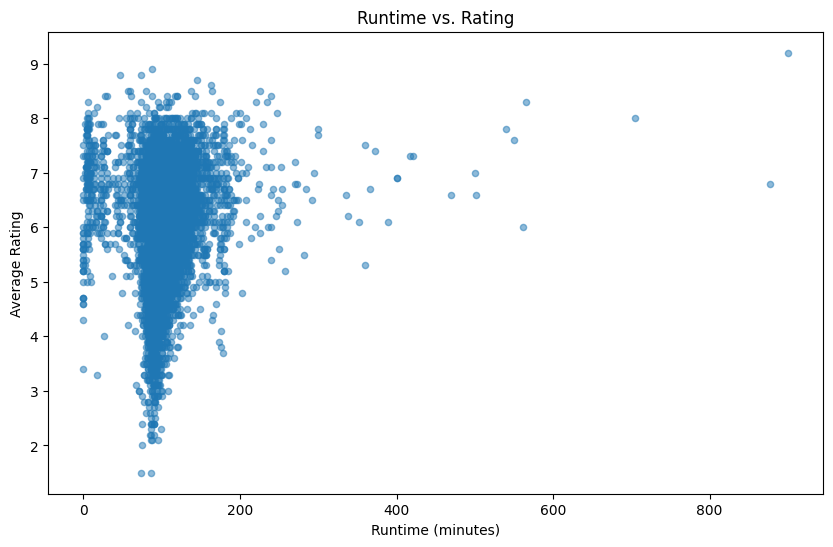

In [104]:
# Scatter plot of 'runtime' vs. 'vote_average'
plot_scatter(df, 'runtime', 'vote_average' , "Runtime vs. Rating" , "Runtime (minutes)", "Average Rating")

This plot shows how the runtime of a movie is associated with vote average


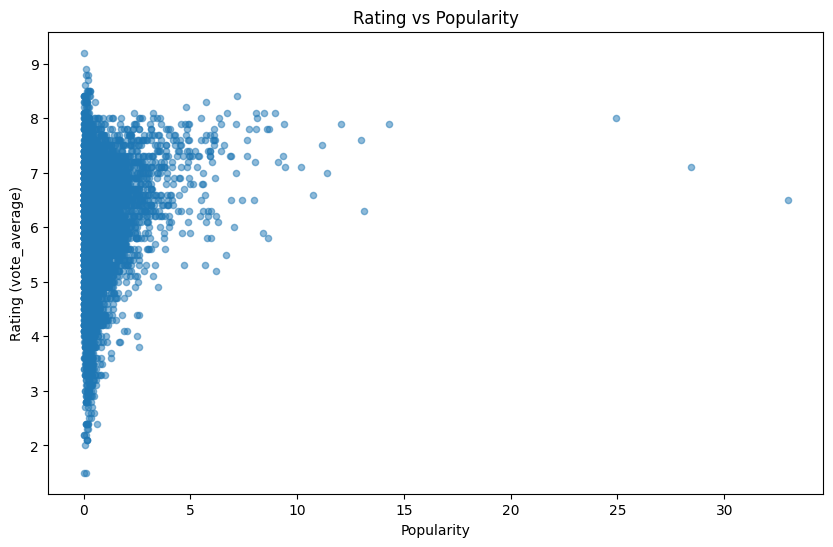

In [105]:
# Plotting Rating vs Popularity
plot_scatter(df,'popularity','vote_average',"Rating vs Popularity" , "Popularity", "Rating (vote_average)")

This scatter plot indicates that many movies with a high vote average were unpopular

###  Question 5  Is a higher budget associated with a higher revenue?

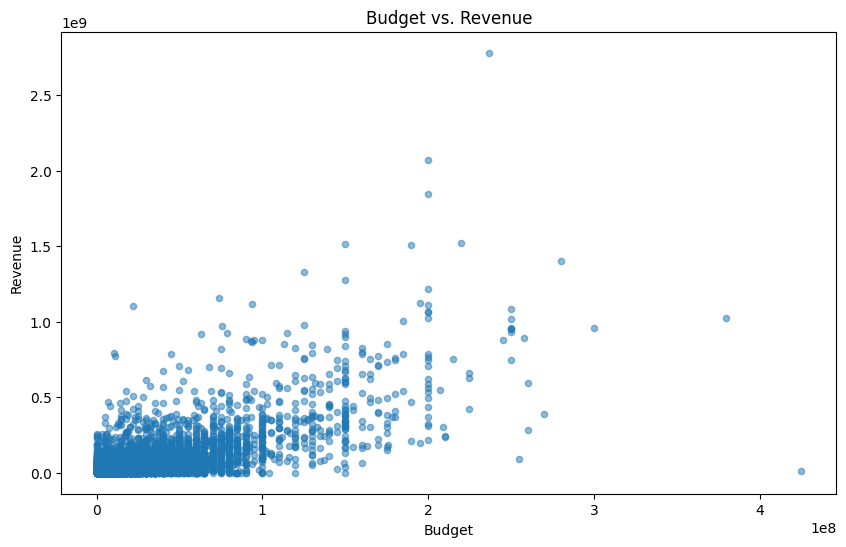

In [106]:
# Scatter plot of 'budget' vs 'revenue'
plot_scatter(df,'budget','revenue',"Budget vs. Revenue", "Budget","Revenue")

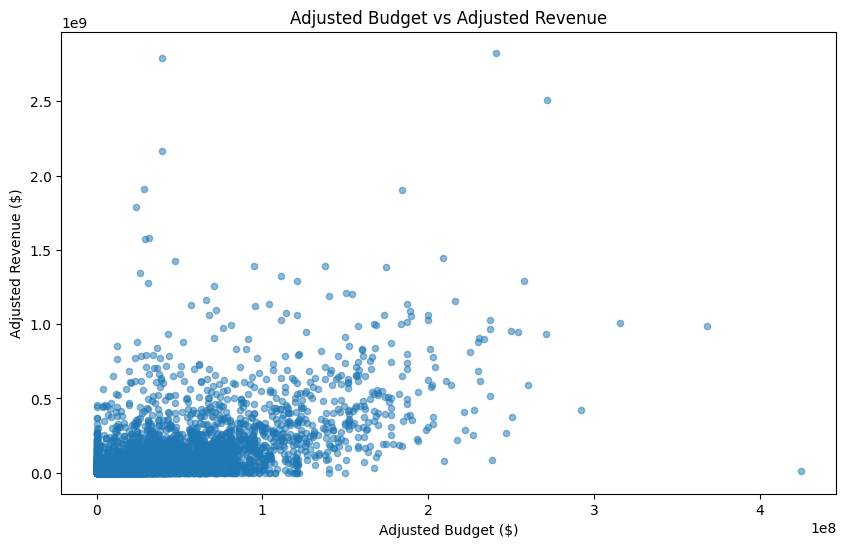

In [107]:
# Scatter plot of 'budget_adj' vs 'revenue_adj'
plot_scatter(df,'budget_adj','revenue_adj',"Adjusted Budget vs Adjusted Revenue", "Adjusted Budget ($)","Adjusted Revenue ($)")

The preceding plots shows increasing budgets along with increasing revenue.

###  Question 6   Which genres were produced the most and which were the most popular?

In [108]:
# Split the 'genres' column, expand it, and count occurrences
genres_split = split_genres(df, 'genres')
# Calculate total count of each genre and mean popularity
genre_counts = genres_split['genres'].value_counts()
genre_popularity = genres_split.groupby('genres')['popularity'].mean()


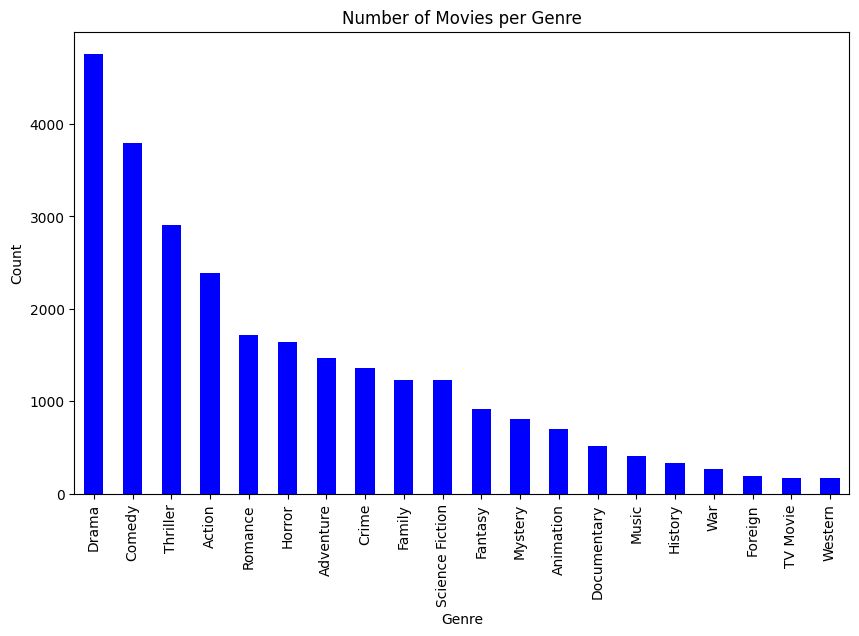

In [109]:
# Plot genre counts
plot_bar(genre_counts, "Number of Movies per Genre", "Genre" ,"Count")

The bar chart shows the number of movies produced for each genre, and Drama being the most produced genre.

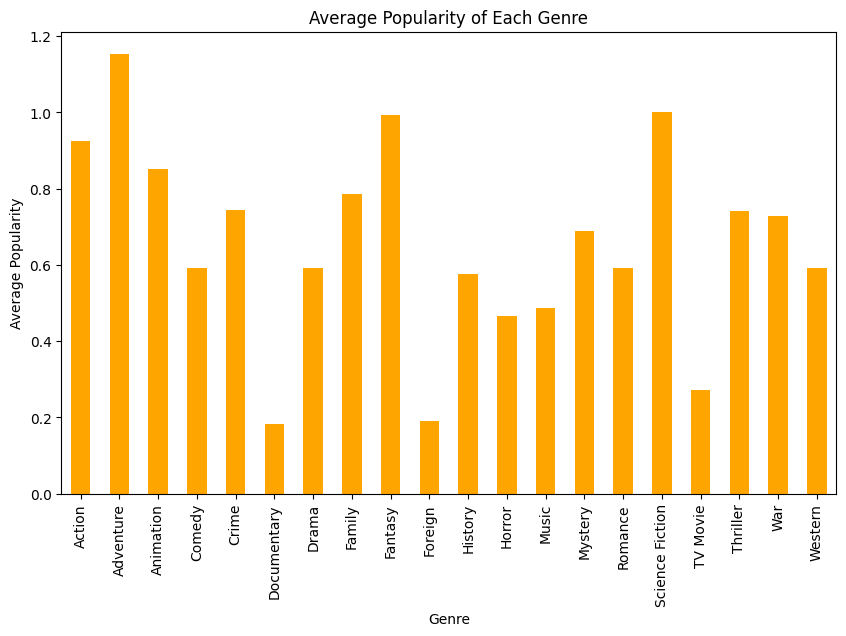

In [110]:
# Plot genre popularity

plot_bar(genre_popularity, "Average Popularity of Each Genre", "Genre" ,"Average Popularity",'orange')

The graph above shows the average popularity for each genre, highlighting Adventure as the most popular genre.

###  Question 7  Which were the top 10 most successfull movies of all time?

In [111]:
# Sort the dataset by 'revenue' to find the most successful movies
top_movies = df.sort_values(by='revenue', ascending=False).head(10)

# Select the movie titles and revenues
top_movies_data = top_movies[['original_title', 'revenue']]


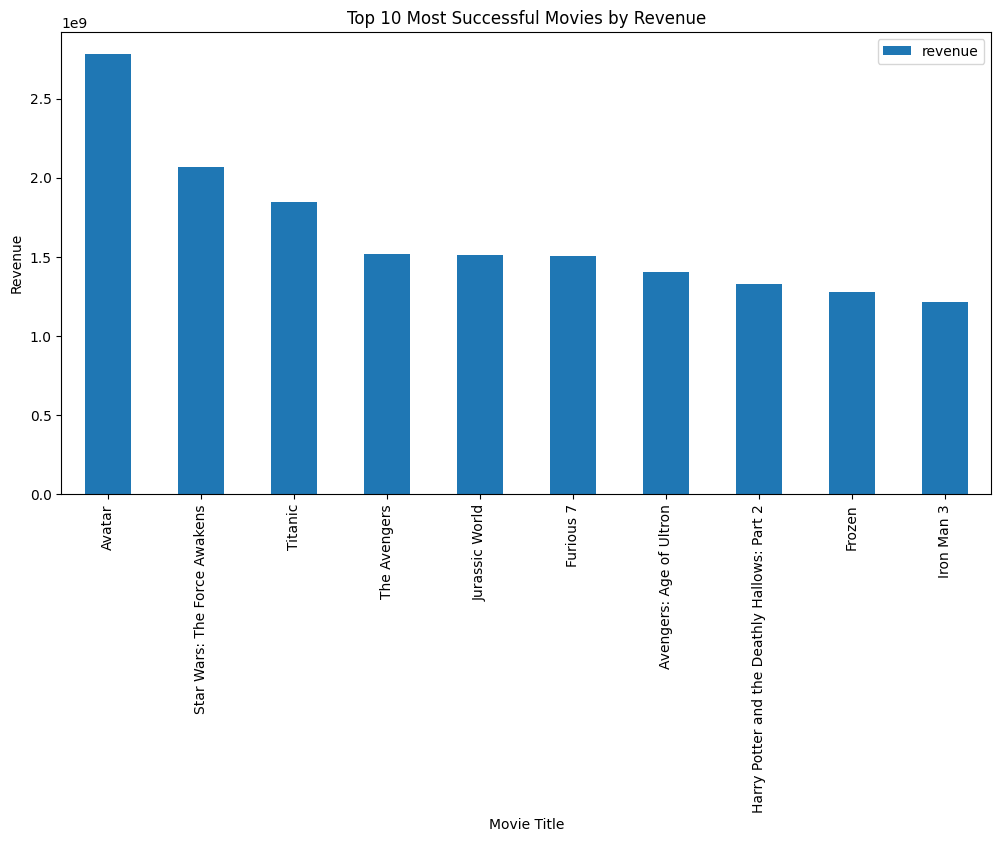

In [112]:
# Plot the top 10 movies
top_movies_data.plot(kind='bar', x='original_title', y='revenue', figsize=(12, 6), title="Top 10 Most Successful Movies by Revenue")
plt.xlabel("Movie Title")
plt.ylabel("Revenue")
plt.show()

 This bar chart shows the top 10 movies by revenue, to see which movies were the most financially successful.

<a id='conclusions'></a>
## Conclusions

This analysis explored various aspects of movie data from The Movie Database (TMDb), focusing on trends in movie genres, production, and financial success.

- Genre Popularity Over Time: The analysis of genre popularity over the years revealed that genres like Action and Adventure have consistently grown in popularity, while others, such as Drama and Romance, have experienced more fluctuating trends. This indicates that audience preferences have evolved over time, with certain genres maintaining a stronger presence.

- Increase in Movie Production: The histogram of movie release years clearly shows a significant increase in the number of movies produced annually since 2000, reflecting the growing film industry and the rise of global content production.

- Director Analysis: The investigation into movie production by directors highlighted Woody Allen as the most prolific director in this dataset, showcasing his significant contribution to the movie industry.

- Runtime and Movie Ratings: Scatterplots examining the relationship between runtime and movie popularity, as well as vote averages, suggest that movies with runtimes under 200 minutes are generally more popular and tend to receive higher ratings. However, this correlation does not imply causality, as other factors such as genre, director, and production quality could also influence these outcomes.

- Budget and Revenue: The analysis of budget versus revenue reveals a positive correlation, where higher-budget movies tend to generate higher revenues. However, it is crucial to note that this is not a causal relationship. Multiple factors, including genre, marketing efforts, and star power, play a role in a movie’s financial success.

- Genre Production and Popularity: The most frequently produced genres were Comedy and Drama, while Adventure emerged as the most popular genre based on average popularity scores.

- Top Grossing Movies: The dataset revealed that Avatar is the highest-grossing movie of all time, in terms of revenue generated, further solidifying its place in film history.

## Limitations

While the analysis provides valuable insights, several limitations should be noted:

- Causality: Many of the observed relationships, such as between budget and revenue or runtime and ratings, are correlations and should not be mistaken for causal connections. Various external factors, including marketing, star power, and production quality, influence these outcomes.
- Data Quality: Missing or incomplete data in columns like cast, director, and genres may have influenced the results, particularly in cases where trends were calculated based on incomplete records. Additionally, entries with missing or zero budgets and revenues may skew the analysis, particularly when making inferences about financial success.
- Sample Bias: The dataset may not fully represent all movies produced, and variations in the way movies were recorded (e.g., release types, distribution channels) may introduce biases.

## Conclusion

Despite these limitations, the findings of this analysis offer valuable insights into the movie industry, revealing trends in genre popularity, director output, and the financial dynamics between budget and revenue. Future research could explore deeper relationships, incorporating factors like marketing and production quality to better understand the drivers of success in the film industry.

In [113]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 1040938 bytes to Investigate_a_Dataset.html
